In [40]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from itertools import product
from datetime import datetime as dt
%matplotlib inline

In [2]:
data = pd.read_csv("six_der_sc_202404_l3_data.csv")

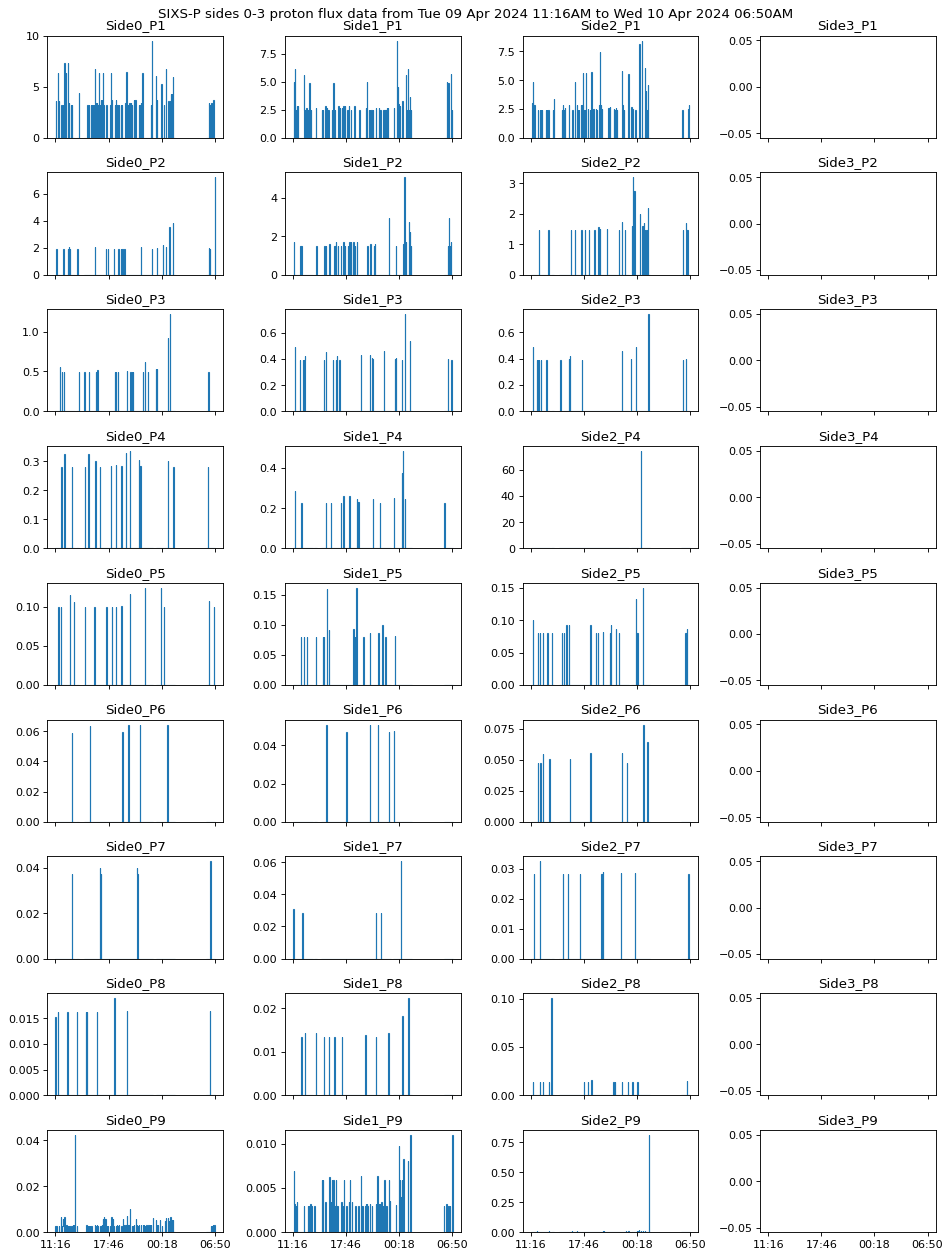

In [58]:
# Side 0-3 proton channel data
side_range = range(4)
channel_range_p = range(1, 10)

# convert ISO format dates to a readable format
time_start = dt.fromisoformat(data.iloc[0, 0]).strftime('%a %d %b %Y %I:%M%p')
time_end = dt.fromisoformat(data.iloc[-1, 0]).strftime('%a %d %b %Y %I:%M%p')

# create a list of side-channel combinations
channels = [f"Side{j}_P{i}" for i, j in product(channel_range_p, side_range)]

# reshape it to plotting configuration
channels = np.array(channels).reshape((len(channel_range_p), len(side_range))) 

fig, axs = plt.subplots(len(channel_range_p), len(side_range), figsize=(12, 16), dpi=80, sharex=True)
fig.suptitle(f"SIXS-P sides 0-3 proton flux data from {time_start} to {time_end}")

for i in range(len(channel_range_p)):
    for j in range(len(side_range)):
        axs[i,j].set_title(channels[i, j])
        axs[i,j].stairs(data[channels[i, j]])

# set 24h clock time as x ticks
time_vals = np.linspace(0,len(data.index) - 1, 4)
time_stamps = [dt.fromisoformat(data.iloc[int(i), 0]).strftime("%H:%M") for i in time_vals]
plt.xticks(time_vals, time_stamps)

plt.tight_layout()

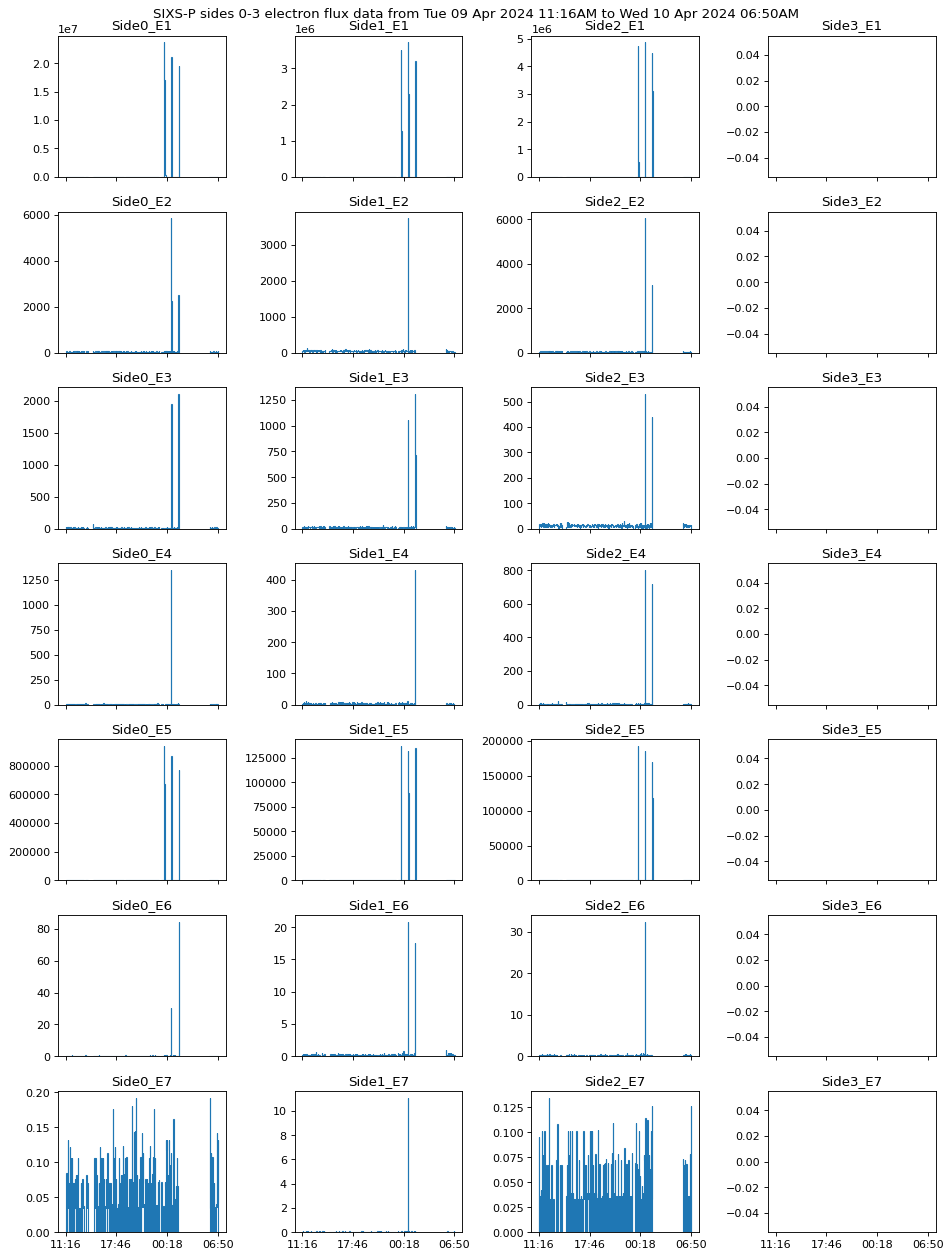

In [62]:
# Electron flux

channel_range_e = range(1, 8)

time_start = dt.fromisoformat(data.iloc[0, 0]).strftime('%a %d %b %Y %I:%M%p')
time_end = dt.fromisoformat(data.iloc[-1, 0]).strftime('%a %d %b %Y %I:%M%p')

channels = [f"Side{j}_E{i}" for i, j in product(channel_range_e, side_range)]

channels = np.array(channels).reshape((len(channel_range_e), len(side_range))) 

fig, axs = plt.subplots(len(channel_range_e), len(side_range), figsize=(12, 16), dpi=80, sharex=True)
fig.suptitle(f"SIXS-P sides 0-3 electron flux data from {time_start} to {time_end}")

for i in range(len(channel_range_e)):
    for j in range(len(side_range)):
        axs[i,j].set_title(channels[i, j])
        axs[i,j].stairs(data[channels[i, j]])

time_vals = np.linspace(0,len(data.index) - 1, 4)
time_stamps = [dt.fromisoformat(data.iloc[int(i), 0]).strftime("%H:%M") for i in time_vals]
plt.xticks(time_vals, time_stamps)

plt.tight_layout()